<a href="https://colab.research.google.com/github/dyjdlopez/numeth2021/blob/main/Week%209-13%20-%20Curve%20Fitting%20Techniques/NuMeth_4_Curve_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curve Fitting and Interpolation
$_{\text{©D.J. Lopez | 2021 | Computational Methods for Computer Engineers}}$

Curve fitting is one of the most used algorithms for optmization expecially in business applications. The use of curve-fitting functions ranges from engineering and signal applications such as approximations and signal replication to business applications in forecasting and operations optimization. In this module, we will discuss the several techniques that can be used in curve fitting. Specifically, we will cover:

* Linear Regression
* Multiple Linear Regression
* Least-Squares Method (Normal Equation Method)
* Polynomial Regression
* Metrics of Regression
* Linear Interpolation
* Lagrange Method
* Newton's Method

## 4.1 Curves
When talking about curves, it is not simply wavy lines or simple drawing elements. Rather in our course, we take curves as functions. In the previous lessons we have seen the graphs of the functions and we call them curves as well. But in this module, we are going to identify what is the function based on sets of data. We can use this for idnetifying missing data or creating approximation for new data considering the function we created. 

### 4.1.1 Extrapolation
Extrapolation can be imagined as the appoximation of data beyond the dataset based on the given data,function, or curve describing a specific dataset. One method in data extrapolation that we will discuss in this course is regression.

### 4.1.2 Interpolation
Interpolation similar to extrapolation approximates data based on existing data, function, or curve but rather finding data beyond the given set of data it finds more specific or missing data points within a dataset.

## 4.2 Extrapolation / Regression

### 4.2.1 Linear Regression
As the name suggests, linear regression tries to find the best fit straight line to a given dataset. This algorithm is one of the simplest yet most important alogorithm in regression since it is the foundation of many more complex regression techniques.

The goal of this algorithm is finding a linear equation that would best describe a set of data. The equation to be used in finding that linear equation is function is given as:
$$y = \omega_0 + \omega_1 X \\ _{\text{(Eq. 4.1)}}$$
Whereas $X$ is the dataset while $y$ is the corresponding values for each datapoint in $X$. The variable $\omega$ is called the weight of the dataset consiting of $\omega_0$ and $\omega_1$. In other literature, $\omega_0$ is called the bias term sometimes written as $b$. The following equations are used to solve for $\omega_0$ and $\omega_1$:
$$\omega_0 = \frac{\bar{y}*\sum(x_i^2-\bar{x})-\sum(x_i*y_i)}{\sum(x^2_i-n\bar{x}^2)}\\ _{\text{(Eq. 4.2)}}$$
$$\omega_1 = \frac{\sum(x_i*y_i)-\bar{x}\sum(y_i)}{\sum(x^2_i-n\bar{x}^2)}\\ _{\text{(Eq. 4.2)}}$$


In [1]:
'''
Since we are going to use datasets for this module, we will be generating dummy 
data with numpy. We will use as matplotlib for visualizing the results as well.
'''
import numpy as np
import matplotlib.pyplot as plt

X: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
y: [ 9.34266029  9.42481365  9.83535149  9.90296078  9.83528789 11.48948032
 11.2325178  12.52304899 12.56843626 12.9059298 ]
w1 approx = 0.4533928441292202,w0 approx. = 8.889670961970694


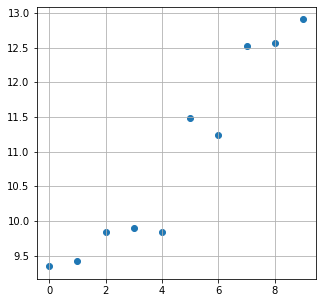

In [33]:
n = 10
X = np.arange(0,n,1,dtype=np.float64)

m = np.random.uniform(0.4,0.5,(n,))
b = np.random.uniform(8,10,(n,))

y = m*X+b 

print(f"X: {X}")
print(f"y: {y}")
print(f"w1 approx = {m.mean()},w0 approx. = {b.mean()}")

plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(X,y)
plt.show()

In [42]:
def linear_regressor(X,y):
  n = X.size
  w0 = (y.mean()*np.sum(X**2)-X.mean()*np.sum(X*y)) / (np.sum(X**2) - n*X.mean()**2)
  w1 = (np.sum(X*y) - X.mean()*np.sum(y)) / (np.sum(X**2) - n*X.mean()**2)
  return w0,w1
w0,w1 = linear_regressor(X,y)
print("Linear Regression Equation: y = {:.3f}x + {:.3f}".format(w1, w0))

Linear Regression Equation: y = 0.443x + 8.911


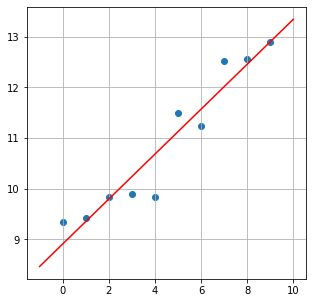

In [36]:
## Plotting the Regression line
def show_regline(X,y,w1,w0):
  x_min, x_max = X.min() - 1, X.max() + 1
  linex = np.linspace(x_min, x_max)
  liney = w1*linex+w0
  plt.figure(figsize=(5,5))
  plt.grid()
  plt.scatter(X,y)
  plt.plot(linex, liney, c='red')
  plt.show()
show_regline(X,y,w1,w0)

13.3445865576548


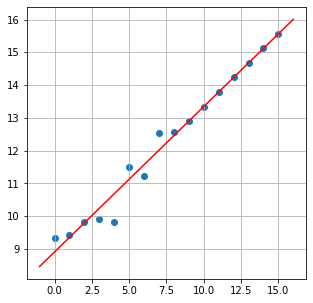

In [37]:
def lin_reg(val,w0,w1):
  return w1*val + w0
print(lin_reg(10, w0, w1))
X_new, y_new = X.copy(), y.copy()
for i in range(10,16):
  X_new = np.insert(X_new,-1, i)
  y_new = np.insert(y_new,-1, lin_reg(i,w0,w1))
show_regline(X_new, y_new, w1, w0)

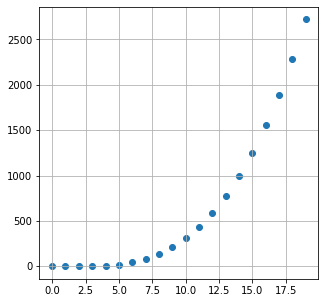

In [46]:
np.random.seed(0)
X_1 = np.arange(0, 20, 1)
y_1 = X_1 - 2 * (X_1 ** 2) + 0.5 * (X_1 ** 3) + np.random.normal(-3, 3, 20)

plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(X_1, y_1)
plt.show()

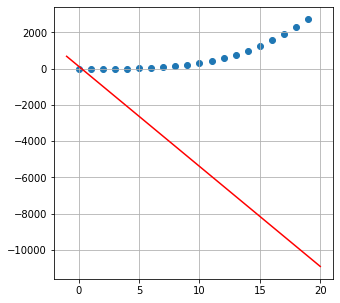

In [47]:
w0_q,w1_q = linear_regressor(X_1, y_1)
show_regline(X_1,y_1,w0_q,w1_q) 

### 4.2.2 Multiple Linear Regression
Multiple linear regression, as the name suggests uses more linear regressors in the algorithm. This can be used if there are more than one features to a dataset. The MLR can be formulated as:
$$y = \omega_0 + \omega_1 x_1 + \omega_2 x_2 + ... + \omega_n x_n \\ _{\text{(Eq. 4.4)}}$$
Whereas $\omega_0$ is the bias term while $\omega_n$ are the weights or slopes of the features $x_n$. The simplest way to implement an MLR algorithm is looping over each feature and their dataset and compute the corresponding weights. In this course, we are going to implement vectorization in implementing MLR. So instead of hte linear equation in Eq. 4.4 we can re-form the equation to the matrix equation:
$$y = \omega X^T$$
Whereas $\omega$ is a vector that includes all the weights of the features $\begin{bmatrix}\omega_0 \\ \omega_1 \\ \omega_2 \\ \vdots \\ \omega_n\end{bmatrix}$. While $X$ are the data of each feature vector $\begin{bmatrix}1\\ x_1 \\ x_2 \\ \vdots \\ x_n\end{bmatrix}$.

We will use the **Normal Equation** in solving MLR. The Normal equation uses the Least-Squares Cost function and is formulated as:
$$\theta = (X^TX)^{-1}X^Ty \\ _{\text{(Eq. 4.5)}}$$
Whereas $\theta$ is the hypothesis or model to be created while $X$ represents the data vector and $y$ represents the labels or values corresponding to the data vector. The term $(X^TX)^{-1}$ is called the **pseudoinverse** or the **Moore-Penrose** matrix. The pseudoinverse of a matrix term of Eq. 4.5 assures that the data are normal or orthogonal. This helps check the property of Autocorrelation between the features of the data. The other properties of datasets that are safe for linear regression are Homoscedasticity, Non-multicollinearity, and Non-endogeneity. These properties will be discussed in depth in the Machine Learning Course of the AIDA Electives. 


In [69]:
X = np.array([
              [1,2,3],
              [7,3,2],
              [9,6,10],
])
y = np.array([[4,3,8]]).T
bias = np.ones(y.shape)
X_train = np.append(bias,X, axis=1).T
X_dot = X_train @ X_train.T
pseudoinv = np.linalg.inv(X_dot)
y_dot = X_train @ y
theta = pseudoinv @ y_dot
for i in range(len(theta)):
  print(f"w{i} : {float(theta[i])}")

w0 : 12.0
w1 : -0.5
w2 : 2.0
w3 : 1.0


### 4.2.3 SciPy Implementation

### 4.2.4 Metrics of Regression

#### Measures of Reliability

#### Measures of Error 

## 4.3 Interpolation

### 4.3.1 Linear Interpolation

### 4.3.2 Lagrange Method

### 4.3.3 Newton's Method